## 0. Intro...

1. **대회 취지**</br>
 `CIBMTR - Equity in post-HCT Survival Predictions` 대회는 조혈모세포(HCT)를 모든 환자가 배경에 상관없이 공평하게 이식받을 수 있도록, 환자의 생존확률을 더 정확히 예측하는 것을 목표로 함. </br>
 특히 현재의 예측 모델들은 종종 사회경제적 지위, 인종, 지리적 위치와 관련된 차이를 해결하지 못하는 바, 이러한 격차를 해결하는 것이 환자 치료의 향상, 자원 활용의 최적화, 의료 시스템에 대한 신뢰 회복을 위해 매우 중요하다.

2. **평가지표**</br>
`Stratified Concordance Index(C-index)`라는 특별한 지표를 사용하여 다양한 환자 집단, 특히 이식 결과에 있어서의 인종 차이에 초점을 맞춰 모델의 예측 성능을 평가하는데 중점을 둔다.</br>
`C-index`가 1.0이면 완벽한 일치, 0.5는 무작위 예측, 0.0은 반대 일치를 의미한다.</br>
- 모든 인종 그룹에서 계산된 C-index 값을 평균을 내고
- 이 평균에서 각 인종 그룹별 C-index의 표준 편차를 뺀다.(인종 간 예측 성능의 일관성을 강조하기 위한 조치)
- 결과적으로 그룹 간 성능 차이가 적고 평균 성능이 높을 수록 좋은 점수를 얻게 됨.
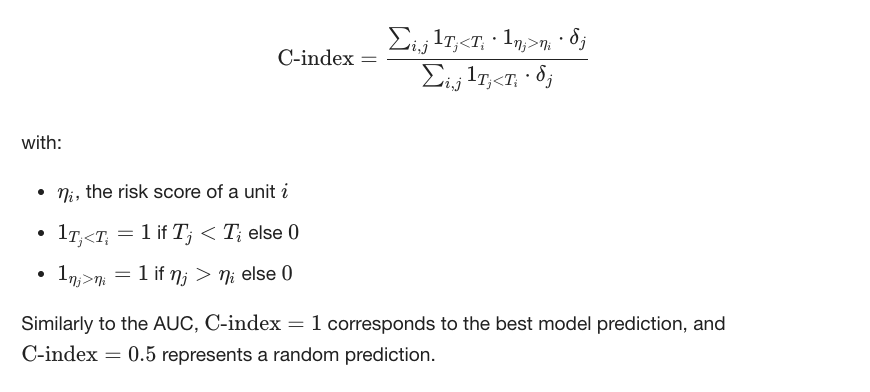

3. **제출  파일 형식**</br>
테스트 데이터셋에 대한 예측을 실수 값의 위험 점수로 제출할 것.
- 형식: `ID,prediction` 
</br>예)</br> 
`28800,0.5`, 
</br>`28801,1.2`
  - `ID`: 각 환자의 식별자
  - `prediction`: 모델이 생성한 해당 환자의 위험 점수</br>

4. **주의사항**</br>
    필자도 단순 분류, 회귀만 해봐서 이런 종류의 대회를 파악하기 까지 시간이 걸렸습니다.</br>
    본 대회는 efs(event 발생 여부), efs_time(event 발생 전까지 걸린 시간) 각각을 예측하는 것이 아니라, 그 둘을 조합하여 `위험 점수` 라는 것을 만들어서 해당 점수를 예측해야하는 것을 목표로 합니다. (예시: `KaplanMeierFitter`) </br>
    그리고 `C-index` 라는 평가지표를 사용하는 바, 점수 그 자체가 아니라 점수를 통한 target들의 `순서` 가 중요합니다.</br>
    또한, 위에 기술한 바 예측 모델이 환자들의 `순서`를 매김에 있어서 인종간에 성능의 차이가 적을수록 좋습니다.</br>
      

## 1. Feature Description(칼럼 특징과 해당 변수 설명)

1. **dri_score**:
   - **설명(Description)**: 질병 위험 지수 (Refined disease risk index)
   - **유형(Type)**: 범주형 (Categorical)
   - **값(Values)**: `Intermediate`, `High`, `N/A - non-malignant indication`, `N/A - pediatric`, `High - TED AML case <missing cytogenetics`, `TBD cytogenetics`, `Low`, `Intermediate - TED AML case <missing cytogenetics`, `N/A - disease not classifiable`, `nan`, `Very high`, `Missing disease status`

2. **psych_disturb**:
   - **설명(Description)**: 정신적 장애 (Psychiatric disturbance)
   - **유형(Type)**: 범주형 (Categorical)
   - **값(Values)**: `Yes`, `No`, `nan`, `Not done`

3. **cyto_score**:
   - **설명(Description)**: 세포유전학 점수 (Cytogenetic score)
   - **유형(Type)**: 범주형 (Categorical)
   - **값(Values)**: `Intermediate`, `Favorable`, `Poor`, `TBD`, `nan`, `Normal`, `Other`, `Not tested`

4. **diabetes**:
   - **설명(Description)**: 당뇨병 (Diabetes)
   - **유형(Type)**: 범주형 (Categorical)
   - **값(Values)**: `No`, `Yes`, `nan`, `Not done`

5. **hla_match_c_high**:
   - **설명(Description)**: 수혜자/제1 기증자 HLA-C 고해상도 맞춤 수준 (Recipient / 1st donor allele level (high resolution) matching at HLA-C)
   - **유형(Type)**: 수치형 (Numerical)

6. **hla_high_res_8**:
   - **설명(Description)**: 수혜자/제1 기증자 HLA-A,-B,-C,-DRB1 고해상도 맞춤 (Recipient / 1st donor allele-level (high resolution) matching at HLA-A,-B,-C,-DRB1)
   - **유형(Type)**: 수치형 (Numerical)

7. **tbi_status**:
   - **설명(Description)**: TBI 상태 (TBI)
   - **유형(Type)**: 범주형 (Categorical)
   - **값(Values)**: `No TBI`, `TBI + Cy +- Other`, `TBI +- Other, <=cGy`, `TBI +- Other, >cGy`, `TBI +- Other, -cGy, single`, `TBI +- Other, unknown dose`, `TBI +- Other, -cGy, unknown dose`, `TBI +- Other, -cGy, fractionated`

8. **arrhythmia**:
   - **설명(Description)**: 부정맥 (Arrhythmia)
   - **유형(Type)**: 범주형 (Categorical)
   - **값(Values)**: `No`, `nan`, `Yes`, `Not done`

9. **hla_low_res_6**:
   - **설명(Description)**: 수혜자/제1 기증자 HLA-A,-B,-DRB1 저해상도 맞춤 (Recipient / 1st donor antigen-level (low resolution) matching at HLA-A,-B,-DRB1)
   - **유형(Type)**: 수치형 (Numerical)

10. **graft_type**:
    - **설명(Description)**: 이식 유형 (Graft type)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `Peripheral blood`, `Bone marrow`

11. **vent_hist**:
    - **설명(Description)**: 기계적 환기 이력 (History of mechanical ventilation)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `No`, `Yes`, `nan`

12. **renal_issue**:
    - **설명(Description)**: 중등도/중증 신장 문제 (Renal, moderate / severe)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `No`, `nan`, `Yes`, `Not done`

13. **pulm_severe**:
    - **설명(Description)**: 중증 폐 문제 (Pulmonary, severe)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `No`, `Yes`, `nan`, `Not done`

14. **prim_disease_hct**:
    - **설명(Description)**: HCT의 주요 질병 (Primary disease for HCT)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `ALL`, `MPN`, `IPA`, `AML`, `MDS`, `Other acute leukemia`, `AI`, `SAA`, `IEA`, `NHL`, `PCD`, `IIS`, `HIS`, `Other leukemia`, `Solid tumor`, `IMD`, `HD`, `CML`

15. **hla_high_res_6**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-A,-B,-DRB1 고해상도 맞춤 (Recipient / 1st donor allele-level (high resolution) matching at HLA-A,-B,-DRB1)
    - **유형(Type)**: 수치형 (Numerical)

16. **cmv_status**:
    - **설명(Description)**: 기증자/수혜자 CMV 혈청 상태 (Donor/recipient CMV serostatus)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `+/-`, `+/+`, `-/-`, `-/+`, `nan`

17. **hla_high_res_10**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-A,-B,-C,-DRB1,-DQB1 고해상도 맞춤 (Recipient / 1st donor allele-level (high resolution) matching at HLA-A,-B,-C,-DRB1,-DQB1)
    - **유형(Type)**: 수치형 (Numerical)

18. **hla_match_dqb1_high**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-DQB1 고해상도 맞춤 수준 (Recipient / 1st donor allele level (high resolution) matching at HLA-DQB1)
    - **유형(Type)**: 수치형 (Numerical)

19. **tce_imm_match**:
    - **설명(Description)**: T-세포 에피토프 면역원성/다양성 맞춤 (T-cell epitope immunogenicity/diversity match)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `P/P`, `nan`, `G/G`, `H/H`, `G/B`, `H/B`, `P/H`, `P/G`, `P/B`

20. **hla_nmdp_6**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-A(lo),-B(lo),-DRB1(hi) 맞춤 (Recipient / 1st donor matching at HLA-A(lo),-B(lo),-DRB1(hi))
    - **유형(Type)**: 수치형 (Numerical)

21. **hla_match_c_low**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-C 저해상도 맞춤 (Recipient / 1st donor antigen level (low resolution) matching at HLA-C)
    - **유형(Type)**: 수치형 (Numerical)

22. **rituximab**:
    - **설명(Description)**: 리툭시맙이 조건화에 사용됨 (Rituximab given in conditioning)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `No`, `Yes`, `nan`

23. **hla_match_drb1_low**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-DRB1 저해상도 맞춤 (Recipient / 1st donor antigen level (low resolution) matching at HLA-DRB1)
    - **유형(Type)**: 수치형 (Numerical)

24. **hla_match_dqb1_low**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-DQB1 저해상도 맞춤 (Recipient / 1st donor antigen level (low resolution) matching at HLA-DQB1)
    - **유형(Type)**: 수치형 (Numerical)

25. **prod_type**:
    - **설명(Description)**: 제품 유형 (Product type)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `PB`, `BM`

26. **cyto_score_detail**:
    - **설명(Description)**: 세포유전학 세부사항 (AML/MDS의 DRI) (Cytogenetics for DRI (AML/MDS))
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `Intermediate`, `nan`, `TBD`, `Favorable`, `Poor`, `Not tested`

27. **conditioning_intensity**:
    - **설명(Description)**: 계획된 조건화 강도 (Computed planned conditioning intensity)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `RIC`, `nan`, `NMA`, `MAC`, `TBD`, `No drugs reported`, `N/A, F(pre-TED) not submitted`

28. **ethnicity**:
    - **설명(Description)**: 민족 (Ethnicity)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `Not Hispanic or Latino`, `Hispanic or Latino`, `nan`, `Non-resident of the U.S.`

29. **year_hct**:
    - **설명(Description)**: HCT 시행 연도 (Year of HCT)
    - **유형(Type)**: 수치형 (Numerical)

30. **obesity**:
    - **설명(Description)**: 비만 (Obesity)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `No`, `Yes`, `nan`, `Not done`

31. **mrd_hct**:
    - **설명(Description)**: HCT 시점의 MRD (AML/ALL) (MRD at time of HCT (AML/ALL))
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `nan`, `Negative`, `Positive`

32. **in_vivo_tcd**:
    - **설명(Description)**: 생체 내 T세포 고갈 (ATG/알렘투주맙) (In-vivo T-cell depletion (ATG/alemtuzumab))
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `Yes`, `No`, `nan`

33. **tce_match**:
    - **설명(Description)**: T-세포 에피토프 맞춤 (T-cell epitope matching)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `Permissive`, `Fully matched`, `nan`, `GvH non-permissive`, `HvG non-permissive`

34. **hla_match_a_high**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-A 고해상도 맞춤 수준 (Recipient / 1st donor allele level (high resolution) matching at HLA-A)
    - **유형(Type)**: 수치형 (Numerical)

35. **hepatic_severe**:
    - **설명(Description)**: 중등도/중증 간 문제 (Hepatic, moderate / severe)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `No`, `nan`, `Yes`, `Not done`

36. **donor_age**:
    - **설명(Description)**: 기증자 나이 (Donor age)
    - **유형(Type)**: 수치형 (Numerical)

37. **prior_tumor**:
    - **설명(Description)**: 이전 고형 종양 (Solid tumor, prior)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `Yes`, `No`, `nan`, `Not done`

38. **hla_match_b_low**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-B 저해상도 맞춤 (Recipient / 1st donor antigen level (low resolution) matching at HLA-B)
    - **유형(Type)**: 수치형 (Numerical)

39. **peptic_ulcer**:
    - **설명(Description)**: 소화성 궤양 (Peptic ulcer)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `No`, `nan`, `Yes`, `Not done`

40. **age_at_hct**:
    - **설명(Description)**: HCT 시 연령 (Age at HCT)
    - **유형(Type)**: 수치형 (Numerical)

41. **hla_match_a_low**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-A 저해상도 맞춤 (Recipient / 1st donor antigen level (low resolution) matching at HLA-A)
    - **유형(Type)**: 수치형 (Numerical)

42. **gvhd_proph**:
    - **설명(Description)**: 계획된 GVHD 예방 (Planned GVHD prophylaxis)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `FK+ MMF +- others`, `Parent Q = yes, but no agent`, `nan`, `FK+ MTX +- others(not MMF)`, `FKalone`, `Cyclophosphamide alone`, `CSA + MMF +- others(not FK)`, `TDEPLETION +- other`, `Cyclophosphamide +- others`, `No GvHD Prophylaxis`, `Other GVHD Prophylaxis`, `CSA alone`, `TDEPLETION alone`, `CDselect alone`, `CSA + MTX +- others(not FMMF,FK)`, `FK+- others(not MMF,MTX)`, `CDselect +- other`, `CSA +- others(not FK,MMF,MTX)`

43. **rheum_issue**:
    - **설명(Description)**: 류마티스 문제 (Rheumatologic)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `No`, `nan`, `Yes`, `Not done`

44. **sex_match**:
    - **설명(Description)**: 기증자/수혜자 성별 맞춤 (Donor/recipient sex match)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `M-M`, `F-F`, `F-M`, `M-F`, `nan`

45. **hla_match_b_high**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-B 고해상도 맞춤 수준 (Recipient / 1st donor allele level (high resolution) matching at HLA-B)
    - **유형(Type)**: 수치형 (Numerical)

46. **race_group**:
    - **설명(Description)**: 인종 (Race)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `White`, `Black or African-American`, `Native Hawaiian or other Pacific Islander`, `Asian`, `American Indian or Alaska Native`, `More than one race`

47. **comorbidity_score**:
    - **설명(Description)**: Sorror 동반질환 점수 (Sorror comorbidity score)
    - **유형(Type)**: 수치형 (Numerical)

48. **karnofsky_score**:
    - **설명(Description)**: HCT 시 Karnofsky 수행 상태(KPS) 점수 (KPS at HCT)
    - **유형(Type)**: 수치형 (Numerical)

49. **hepatic_mild**:
    - **설명(Description)**: 경증 간 문제 (Hepatic, mild)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `No`, `Yes`, `nan`, `Not done`

50. **tce_div_match**:
    - **설명(Description)**: T-세포 에피토프 다양성 맞춤 (T-cell epitope matching)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `Permissive mismatched`, `Bi-directional non-permissive`, `nan`, `GvH non-permissive`, `HvG non-permissive`

51. **donor_related**:
    - **설명(Description)**: 관련 기증자 대 비관련 기증자 (Related vs. unrelated donor)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `Unrelated`, `Related`, `Multiple donor (non-UCB)`, `nan`

52. **melphalan_dose**:
    - **설명(Description)**: 멜팔란 용량 (mg/m^2) (Melphalan dose (mg/m^2))
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `N/A, Mel not given`, `MEL`, `nan`

53. **hla_low_res_8**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-A,-B,-C,-DRB1 저해상도 맞춤 (Recipient / 1st donor antigen-level (low resolution) matching at HLA-A,-B,-C,-DRB1)
    - **유형(Type)**: 수치형 (Numerical)

54. **cardiac**:
    - **설명(Description)**: 심장 문제 (Cardiac)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `No`, `Yes`, `nan`, `Not done`

55. **hla_match_drb1_high**:
    - **설명(Description)**: 수혜자/제1 기증자 HLA-DRB1 고해상도 맞춤 수준 (Recipient / 1st donor allele level (high resolution) matching at HLA-DRB1)
    - **유형(Type)**: 수치형 (Numerical)

56. **pulm_moderate**:
    - **설명(Description)**: 중등도 폐 문제 (Pulmonary, moderate)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `Yes`, `Not done`, `No`, `nan`

57. **hla_low_res_10**:
    - **설명(Description)**: HLA-A,-B,-C,-DRB1 나열 없이 참조됨 (값만 있음, 설명 없음)

58. **efs**:
    - **설명(Description)**: 이벤트 없는 생존 (Event-free survival)
    - **유형(Type)**: 범주형 (Categorical)
    - **값(Values)**: `Event`, `Censoring`

59. **efs_time**:
    - **설명(Description)**: 이벤트 없는 생존 시간 (개월) (Time to event-free survival, months)
    - **유형(Type)**: 수치형 (Numerical)


## 2. EDA 및 target 변수 변환([efs, efs_time] -> y)
https://www.kaggle.com/code/cdeotte/gpu-lightgbm-baseline-cv-681-lb-685

### 2.1 데이터 로드

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# column을 전부 볼 수 있게 500까지 늘려줌
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

test = pd.read_csv("/home/hsk/kaggle_project/CIBMTR-HCT-Prediction/data/raw/test.csv")
print(f"Test shape: {test.shape}")

train = pd.read_csv("/home/hsk/kaggle_project/CIBMTR-HCT-Prediction/data/raw/train.csv")
print(f"Test shape: {train.shape}")

# 실물 영접
train.head(20)


Test shape: (3, 58)
Test shape: (28800, 60)


,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.290,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.230,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.810,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223
5,5,High,No,Poor,Yes,2.0,7.0,TBI + Cy +- Other,No,4.0,Peripheral blood,No,No,No,ALL,5.0,+/+,8.0,1.0,P/P,6.0,1.0,No,1.0,1.0,PB,TBD,MAC,Hispanic or Latino,2015,Yes,NaN,No,NaN,2.0,No,27.274,No,1.0,No,32.143,2.0,Cyclophosphamide alone,No,F-F,1.0,White,2.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",5.0,No,2.0,Yes,6.0,1.0,7.095
6,6,Low,No,Poor,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,-/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,RIC,Not Hispanic or Latino,2016,No,NaN,No,Permissive,2.0,No,45.016,No,2.0,No,17.673,2.0,FK+ MMF +- others,No,M-M,2.0,More than one race,1.0,90.0,No,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,0.0,46.464
7,7,High,No,NaN,Not done,2.0,5.0,TBI + Cy +- Other,No,3.0,Peripheral blood,No,No,No,IIS,3.0,-/-,6.0,1.0,NaN,3.0,2.0,No,1.0,1.0,BM,NaN,NaN,Not Hispanic or Latino,2018,No,NaN,Yes,NaN,1.0,No,23.102,No,1.0,No,11.073,1.0,Cyclophosphamide alone,No,M-F,1.0,More than one race,0.0,90.0,No,NaN,Related,"N/A, Mel not given",5.0,No,1.0,No,6.0,0.0,18.076
8,8,Intermediate,No,Other,No,NaN,NaN,TBI + Cy +- Other,No,6.0,Peripheral blood,No,No,No,ALL,NaN,-/+,NaN,2.0,NaN,NaN,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2008,No,Negative,No,NaN,NaN,No,36.010,No,2.0,No,35.517,2.0,FK+ MMF +- others,No,F-F,2.0,American Indian or Alaska Native,3.0,90.0,No,NaN,Related,"N/A, Mel not given",8.0,No,NaN,Yes,10.0,1.0,10.130
9,9,Intermediate,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Per

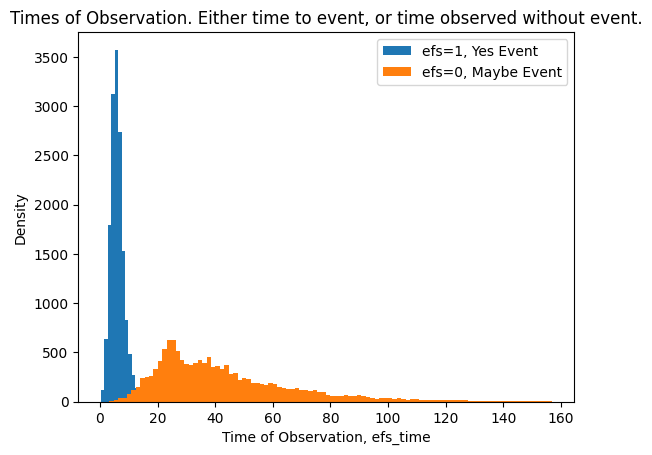

In [15]:
# event 발생 여부(efs)에 따른 생존 시간(efs_time) 분포 확인

plt.hist(train.loc[train.efs==1,"efs_time"],bins=100,label="efs=1, Yes Event")
plt.hist(train.loc[train.efs==0,"efs_time"],bins=100,label="efs=0, Maybe Event")
plt.xlabel("Time of Observation, efs_time")

plt.ylabel("Density")
plt.title("Times of Observation. Either time to event, or time observed without event.")
plt.legend()
plt.show()

### 2.2 데이터 변환([efs, efs_time] -> [y])
KaplanMeierFitter 사용하여 변환

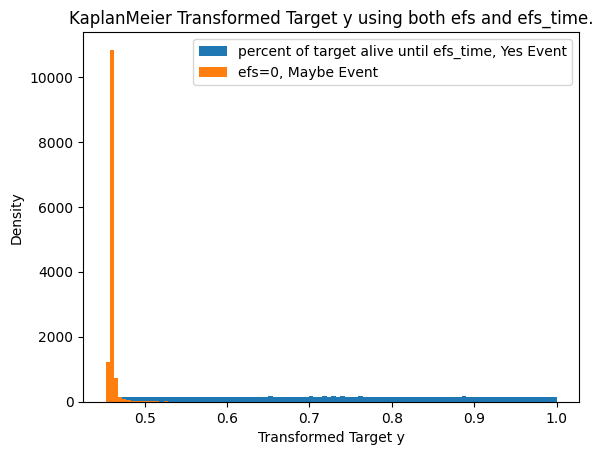

In [16]:
# efs, efs_time 두 Target 변수를 하나의 Target 변수로 바꿔주기 (KaplanMeier 활용)
# lifelines 라이브러리 import
from lifelines import KaplanMeierFitter

# KaplanMeierFitter 이용하여 두 타겟 칼럼을 하나의 칼럼으로 만들어주기
def transform_survival_probability(df, time_col = 'efs_time', event_col = 'efs'):
    kmf = KaplanMeierFitter()
    kmf.fit(df[time_col], df[event_col])
    target = kmf.survival_function_at_times(df[time_col]).values
    return target

train["y"] = transform_survival_probability(train, time_col = 'efs_time', event_col = 'efs')

plt.hist(train.loc[train.efs==1, "y"], bins = 100, label = "percent of target alive until efs_time, Yes Event")
plt.hist(train.loc[train.efs==0, "y"], bins = 100, label = "efs=0, Maybe Event")
plt.xlabel("Transformed Target y")
plt.ylabel("Density")
plt.title("KaplanMeier Transformed Target y using both efs and efs_time.")
plt.legend()
plt.show()

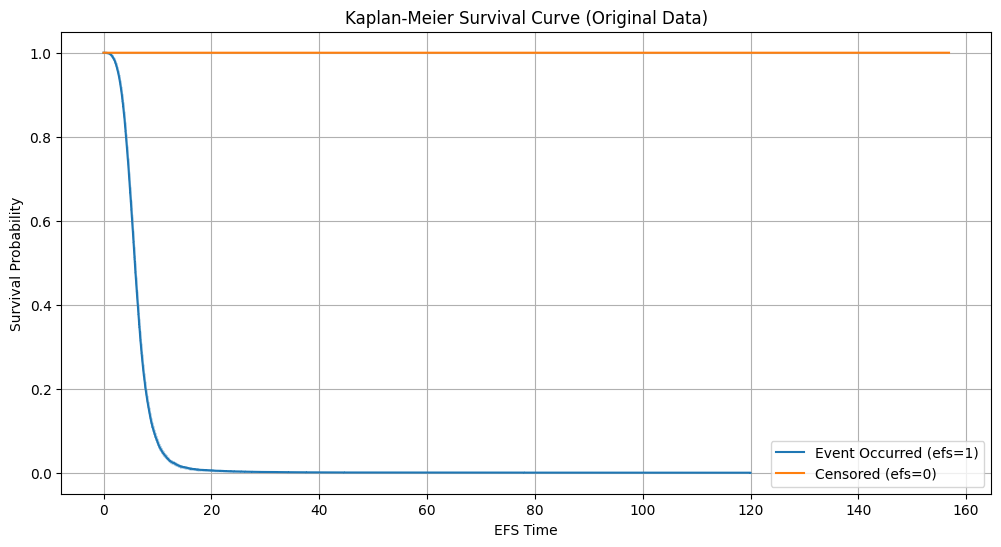

In [39]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Kaplan-Meier 추정기 생성
kmf = KaplanMeierFitter()

# 사건 발생 그룹(efs=1)
plt.figure(figsize=(12, 6))
kmf.fit(train.loc[train['efs'] == 1, 'efs_time'], train.loc[train['efs'] == 1, 'efs'])
kmf.plot(label='Event Occurred (efs=1)')

# 사건 미발생 그룹(efs=0)
kmf.fit(train.loc[train['efs'] == 0, 'efs_time'], train.loc[train['efs'] == 0, 'efs'])
kmf.plot(label='Censored (efs=0)')

plt.title('Kaplan-Meier Survival Curve (Original Data)')
plt.xlabel('EFS Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()


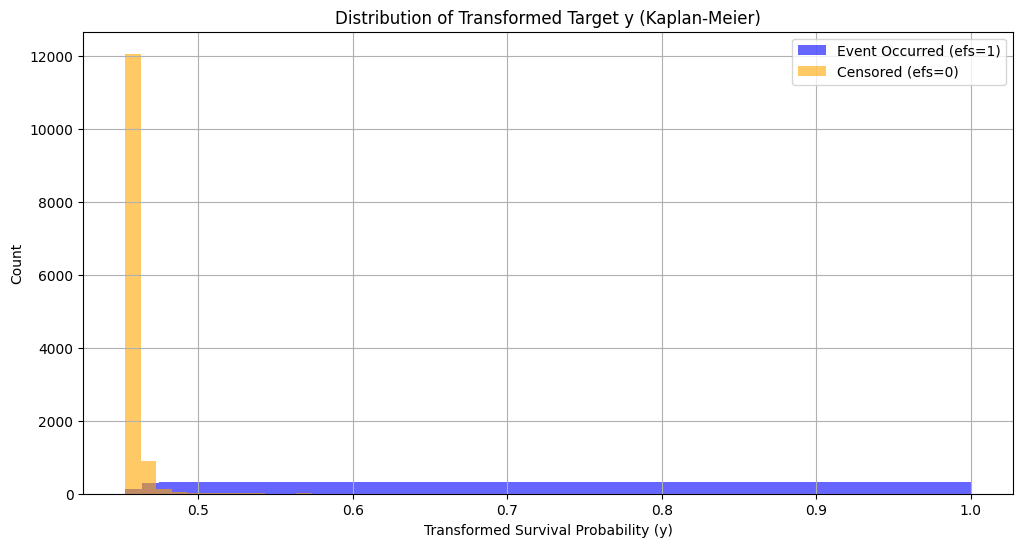

In [27]:
plt.figure(figsize=(12, 6))

# 사건 발생 그룹(efs=1)
plt.hist(train.loc[train['efs'] == 1, 'y'], bins=50, alpha=0.6, label='Event Occurred (efs=1)', color='blue')

# 사건 미발생 그룹(efs=0)
plt.hist(train.loc[train['efs'] == 0, 'y'], bins=50, alpha=0.6, label='Censored (efs=0)', color='orange')

plt.title('Distribution of Transformed Target y (Kaplan-Meier)')
plt.xlabel('Transformed Survival Probability (y)')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


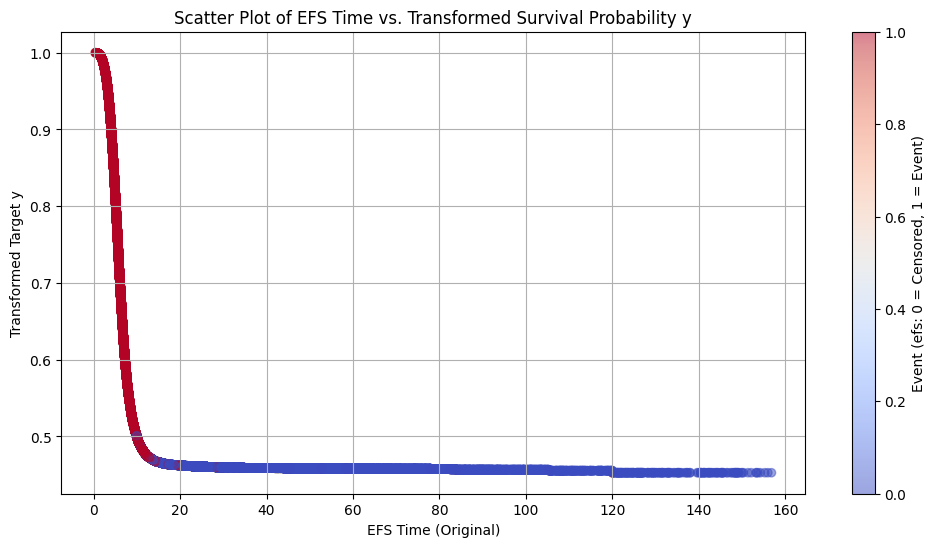

In [33]:
plt.figure(figsize=(12, 6))
plt.scatter(train['efs_time'], train['y'], c=train['efs'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='Event (efs: 0 = Censored, 1 = Event)')
plt.title('Scatter Plot of EFS Time vs. Transformed Survival Probability y')
plt.xlabel('EFS Time (Original)')
plt.ylabel('Transformed Target y')
plt.grid(True)
plt.show()


In [17]:
# 불필요한 칼럼 제거
# train은 유지하고(원본) efs, efs_time을 y로 바꿔줬으므로 train_dataset에서 제거
train_dataset = train.drop(['efs', 'efs_time'], axis = 1)

### 2.3 concat 후에 결측치 보완 및 수치형 변환하고, 이를 재분리

In [18]:
# 데이터 합쳐주고
total_dataset = pd.concat([train_dataset, test], axis = 0, ignore_index = True)

# ID 칼럼은 불필요하므로 제거
total_dataset = total_dataset.drop(['ID'], axis = 1)

In [19]:
# 문자열 데이터가 곧 범주형 데이터인지 확인
for column in total_dataset.columns:
    if total_dataset[column].dtype == "object":
        # 고유한 값의 개수를 확인하여 범주형 데이터인지 텍스트 데이터인지 판단
        unique_values = total_dataset[column].nunique()
        
        # 고유한 값이 50개 이하인 경우 범주형 데이터로 간주 (임의 판단)
        if unique_values <= 50:
            print(f"'{column}'은 범주형 데이터입니다. 고유 값 개수: {unique_values}")
        else:
            print(f"'{column}'은 텍스트 데이터입니다. 고유 값 개수: {unique_values}")

'dri_score'은 범주형 데이터입니다. 고유 값 개수: 11
'psych_disturb'은 범주형 데이터입니다. 고유 값 개수: 3
'cyto_score'은 범주형 데이터입니다. 고유 값 개수: 7
'diabetes'은 범주형 데이터입니다. 고유 값 개수: 3
'tbi_status'은 범주형 데이터입니다. 고유 값 개수: 8
'arrhythmia'은 범주형 데이터입니다. 고유 값 개수: 3
'graft_type'은 범주형 데이터입니다. 고유 값 개수: 2
'vent_hist'은 범주형 데이터입니다. 고유 값 개수: 2
'renal_issue'은 범주형 데이터입니다. 고유 값 개수: 3
'pulm_severe'은 범주형 데이터입니다. 고유 값 개수: 3
'prim_disease_hct'은 범주형 데이터입니다. 고유 값 개수: 18
'cmv_status'은 범주형 데이터입니다. 고유 값 개수: 4
'tce_imm_match'은 범주형 데이터입니다. 고유 값 개수: 8
'rituximab'은 범주형 데이터입니다. 고유 값 개수: 2
'prod_type'은 범주형 데이터입니다. 고유 값 개수: 2
'cyto_score_detail'은 범주형 데이터입니다. 고유 값 개수: 5
'conditioning_intensity'은 범주형 데이터입니다. 고유 값 개수: 6
'ethnicity'은 범주형 데이터입니다. 고유 값 개수: 3
'obesity'은 범주형 데이터입니다. 고유 값 개수: 3
'mrd_hct'은 범주형 데이터입니다. 고유 값 개수: 2
'in_vivo_tcd'은 범주형 데이터입니다. 고유 값 개수: 2
'tce_match'은 범주형 데이터입니다. 고유 값 개수: 4
'hepatic_severe'은 범주형 데이터입니다. 고유 값 개수: 3
'prior_tumor'은 범주형 데이터입니다. 고유 값 개수: 3
'peptic_ulcer'은 범주형 데이터입니다. 고유 값 개수: 3
'gvhd_proph'은 범주형 데이터입니다. 고유 값 개수: 17
'rheum_i

In [20]:
# 전체 칼럼 루프 돌면서
for column in total_dataset.columns:
    # 범주형 변수 > 결측치 메꿔주고 > 수치형으로 바꿔주기 (XGBoost가 결측치는 메꿔주는데 수치형으로는 들어가야함)
    if total_dataset[column].dtype == "object":
        total_dataset[column] = total_dataset[column].fillna("NaN")
        total_dataset[column], uniques = total_dataset[column].factorize() # 정수형으로 변환
        total_dataset[column] -= total_dataset[column].min() # 최솟값 빼줘서 출발점을 0으로 맞춤 일종의 정규화
        total_dataset[column] = total_dataset[column].astype("int32") # int32로 변환하여 메모리 사용량 아껴주고
        total_dataset[column] = total_dataset[column].astype("category") # 범주형 데이터로 바꿔서 순서, 빈도 등의 특성 유지

    # 수치형 변수 > 데이터 형변환하여 계산비용 줄여주기
    else:
        if total_dataset[column].dtype == "float64":
            total_dataset[column] = total_dataset[column].astype("float32")
        
        if total_dataset[column].dtype == "int64":
            total_dataset[column] = total_dataset[column].astype("int32")


train_dataset = total_dataset.iloc[:len(train)].copy()
test_dataset = total_dataset.iloc[len(train):].reset_index(drop=True).copy()

In [21]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb
print("Using XGBoost version",xgb.__version__)

Using XGBoost version 2.1.4


In [23]:
# KFold 교차 검증 사용하여 학습
FOLDS = 10
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)
    
# Out-of-Fold 예측 결과를 저장하는 배열 초기화, 훈련 데이터에 대해 예측한 값들을 나중에 저장함.
oof_xgb = np.zeros(len(train))

# Test 데이터에 대한 예측값 저장하는 배열. 모든 폴드에서 예측한 결과의 평균을 낼 것.
pred_xgb = np.zeros(len(test))

# train 데이터셋에 대하여 KFold로 나누고, 각 폴드마다 train_index와 test_index를 생성 (train이랑 valid임.)
for i, (train_index, valid_index) in enumerate(kf.split(train_dataset)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)
    
    x_train = train_dataset.loc[train_index].drop(columns = ["y"]).copy()
    y_train = train_dataset.loc[train_index,"y"]
    x_valid = train_dataset.loc[valid_index].drop(columns = ["y"]).copy()
    y_valid = train_dataset.loc[valid_index,"y"]
    x_test = test_dataset.drop(columns=["y"]).copy()

    model_xgb = XGBRegressor(
        device="cpu",
        max_depth=3,  
        colsample_bytree=0.5,  
        subsample=0.8,  
        n_estimators=2000,  
        learning_rate=0.02,  
        enable_categorical=True,
        min_child_weight=80,
        #early_stopping_rounds=25,
    )
    model_xgb.fit(
        x_train, y_train,
        eval_set=[(x_valid, y_valid)],  
        verbose=500 
    )

    # INFER OOF
    oof_xgb[valid_index] = model_xgb.predict(x_valid)
    # INFER TEST
    pred_xgb += model_xgb.predict(x_test)

# COMPUTE AVERAGE TEST PREDS
pred_xgb /= FOLDS

#########################
### Fold 1
#########################
[0]	validation_0-rmse:0.17777
[500]	validation_0-rmse:0.15955
[1000]	validation_0-rmse:0.15742
[1500]	validation_0-rmse:0.15645
[1999]	validation_0-rmse:0.15581
#########################
### Fold 2
#########################
[0]	validation_0-rmse:0.17354
[500]	validation_0-rmse:0.15577
[1000]	validation_0-rmse:0.15422
[1500]	validation_0-rmse:0.15353
[1999]	validation_0-rmse:0.15314
#########################
### Fold 3
#########################
[0]	validation_0-rmse:0.17727
[500]	validation_0-rmse:0.15814
[1000]	validation_0-rmse:0.15622
[1500]	validation_0-rmse:0.15546
[1999]	validation_0-rmse:0.15514
#########################
### Fold 4
#########################
[0]	validation_0-rmse:0.17923
[500]	validation_0-rmse:0.16014
[1000]	validation_0-rmse:0.15801
[1500]	validation_0-rmse:0.15718
[1999]	validation_0-rmse:0.15675
#########################
### Fold 5
#########################
[0]	validation_0-rmse:0.17369
[500]	valid

In [ ]:
# https://www.kaggle.com/code/metric/eefs-concordance-index
"""
To evaluate the equitable prediction of transplant survival outcomes,
we use the concordance index (C-index) between a series of event
times and a predicted score across each race group.
 
It represents the global assessment of the model discrimination power:
this is the model’s ability to correctly provide a reliable ranking
of the survival times based on the individual risk scores.
 
The concordance index is a value between 0 and 1 where:
 
0.5 is the expected result from random predictions,
1.0 is perfect concordance (with no censoring, otherwise <1.0),
0.0 is perfect anti-concordance (with no censoring, otherwise >0.0)

"""

import pandas as pd
import pandas.api.types
import numpy as np
from lifelines.utils import concordance_index

class ParticipantVisibleError(Exception):
    pass


def score(solution: pd.DataFrame, submission: pd.DataFrame, row_id_column_name: str) -> float:
    """
    >>> import pandas as pd
    >>> row_id_column_name = "id"
    >>> y_pred = {'prediction': {0: 1.0, 1: 0.0, 2: 1.0}}
    >>> y_pred = pd.DataFrame(y_pred)
    >>> y_pred.insert(0, row_id_column_name, range(len(y_pred)))
    >>> y_true = { 'efs': {0: 1.0, 1: 0.0, 2: 0.0}, 'efs_time': {0: 25.1234,1: 250.1234,2: 2500.1234}, 'race_group': {0: 'race_group_1', 1: 'race_group_1', 2: 'race_group_1'}}
    >>> y_true = pd.DataFrame(y_true)
    >>> y_true.insert(0, row_id_column_name, range(len(y_true)))
    >>> score(y_true.copy(), y_pred.copy(), row_id_column_name)
    0.75
    """
    
    del solution[row_id_column_name]
    del submission[row_id_column_name]
    
    event_label = 'efs'
    interval_label = 'efs_time'
    prediction_label = 'prediction'
    for col in submission.columns:
        if not pandas.api.types.is_numeric_dtype(submission[col]):
            raise ParticipantVisibleError(f'Submission column {col} must be a number')
    # Merging solution and submission dfs on ID
    merged_df = pd.concat([solution, submission], axis=1)
    merged_df.reset_index(inplace=True)
    merged_df_race_dict = dict(merged_df.groupby(['race_group']).groups)
    metric_list = []
    for race in merged_df_race_dict.keys():
        # Retrieving values from y_test based on index
        indices = sorted(merged_df_race_dict[race])
        merged_df_race = merged_df.iloc[indices]
        # Calculate the concordance index
        c_index_race = concordance_index(
                        merged_df_race[interval_label],  # efs_time: 사건 발생까지의 시간
                        -merged_df_race[prediction_label],  # prediction: 생존 확률(음수 처리, 높을수록 낮은 위험을 의미하기에)
                        merged_df_race[event_label])  # 사건 발생 여부
        metric_list.append(c_index_race)
    return float(np.mean(metric_list)-np.sqrt(np.var(metric_list)))

In [ ]:
y_true = train[["ID","efs","efs_time","race_group"]].copy()
y_pred = train[["ID"]].copy()
y_pred["prediction"] = oof_xgb

# 모델이 예측한 생존 확률과 실제 생존 시간을 비교하여 순서 일관성을 평가
# 높은 C-index score는 예측된 생존 확률이 실제 생존 시간과 일치하는 정도를 의미함.
m = score(y_true.copy(), y_pred.copy(), "ID")
print(f"\nOverall CV for XGBoost KaplanMeier =",m)


Overall CV for XGBoost KaplanMeier = 0.6741788982664247


In [ ]:
feature_importance = model_xgb.feature_importances_
importance_df = pd.DataFrame({
    "Feature": FEATURES,  # Replace FEATURES with your list of feature names
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)
plt.figure(figsize=(10, 15))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("XGBoost KaplanMeier Feature Importance")
plt.gca().invert_yaxis()  # Flip features for better readability
plt.show()